In [174]:
#Name: Anand Kadu
#Roll No: ES15BTECH11004
#Linear Regression Implementation

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import svm
from numpy import loadtxt
from urllib.request import urlopen
from sklearn.metrics import accuracy_score
from numpy.linalg import inv

data = np.asarray(np.loadtxt(r'/home/anand/Documents/CSE Courses/Applied Machine Learning/Solutions/HW3_Solutions/linregdata',delimiter=",",dtype=str))

# for i in range(len(data)):
#     if(data[i,0] == 'M'):
#         data[i,0]= '001'
#     if(data[i,0] == 'I'):
#         data[i,0]= '010'
#     if(data[i,0] == 'F'):
#         data[i,0]= '100'

part = data[:,0]
data = np.delete(data,0,1)
data = data.astype(np.float)
        
std = []
mean = np.mean(data,axis=0)

for i in range(len(data[0])-1):
    std.append(np.std(data[:,i],axis=0)) 

#### For standardizing the attributes

for i in range(len(data)):
    for j in range(len(data[0])-1):
        data[i,j] = (data[i,j] - mean[j])/ std[j]
        
x = data[:,:len(data[0])-1]
y = data[:,len(data[0])-1]
x = pd.DataFrame(x)
# print(data)

### converting the attribute into a three column binary representation.
part = pd.DataFrame(part)
part = pd.get_dummies(part)
x = pd.concat([x,part],axis=1)
x = x.as_matrix()
     

['M' '0.455' '0.365' '0.095' '0.514' '0.2245' '0.101' '0.15' '15']
['M' '0.35' '0.265' '0.09' '0.2255' '0.0995' '0.0485' '0.07' '7']
             0         1         2         3         4         5         6  \
0    -0.574558 -0.432149 -1.064424 -0.641898 -0.607685 -0.726212 -0.638217   
1    -1.448986 -1.439929 -1.183978 -1.230277 -1.170910 -1.205221 -1.212987   
2     0.050033  0.122130 -0.107991 -0.309469 -0.463500 -0.356690 -0.207139   
3    -0.699476 -0.432149 -0.347099 -0.637819 -0.648238 -0.607600 -0.602294   
4    -1.615544 -1.540707 -1.423087 -1.272086 -1.215968 -1.287337 -1.320757   
5    -0.824395 -1.087206 -1.064424 -0.973307 -0.983919 -0.940625 -0.853756   
6     0.050033  0.071741  0.250672 -0.104505 -0.551363 -0.356690  0.655017   
7     0.174951  0.172519 -0.347099 -0.123880 -0.294533 -0.283698  0.152092   
8    -0.408000 -0.381760 -0.347099 -0.651076 -0.643732 -0.621286 -0.530447   
9     0.216591  0.323686  0.250672  0.134109 -0.202164 -0.270012  0.583170   
10    0.0

In [129]:
# 1c 1st part
def mylinridgereg(x,y,lamb):
    w = np.dot(inv(np.dot(np.transpose(x), x) + lamb * np.identity(len(x[0]))) , np.dot(np.transpose(x), y))
#     print(w)
    return w
weights = mylinridgereg(x,y,100)

In [130]:
# 1c 2nd part
def mylinridgeregeval(x, weights):
    ans = np.dot(x,weights)
#     print(ans)
    return ans
    
y_dash = mylinridgeregeval(x, weights)
        

In [131]:
# 1c 3rd part
def meansquarederr(T, Tdash):
    err = 0
    for i in range(len(T)):
        err += pow((T[i] - Tdash[i]), 2)
#     print(err/len(T)) 
    return err/len(T)
meansquarederr(y, y_dash)

5.407622259189625

Lambda minimum = -1.7763568394002505e-14, Error corrsponding to this lambda = 4.693794592586449
Minimum weights =  [-0.21701565  1.23153679  0.41076178  4.16764759 -4.27819866 -0.99098722
  1.21639845 10.15007868  9.29808488 10.25782755]


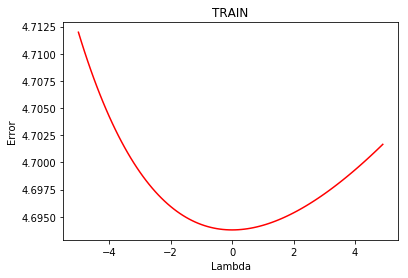

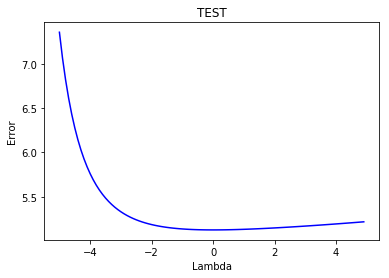

In [232]:
%matplotlib inline
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

lamb = np.arange(-5,5,0.1)
ans =[]
mini = 100
for i in range(len(lamb)):
    weights = mylinridgereg(X_train,y_train,lamb[i])
    y_dash = mylinridgeregeval(X_train, weights)
    ans.append(meansquarederr(y_train, y_dash))
    if(mini > ans[i]):
        mini = ans[i]
        lamb_min = lamb[i]
        weight_min = weights
#     y_dash = mylinridgeregeval(X_test, weights)
#     ans.append(meansquarederr(y_test, y_dash))
    
np.asarray(ans)
print("Lambda minimum = {0}, Error corrsponding to this lambda = {1}".format(lamb_min,mini))
print("Minimum weights = ",weight_min)
weight_pos = []                        # converting all weights to positive
for i in range(len(weight_min)):
    if weight_min[i] < 0:
        weight_pos.append(-weight_min[i])
    else:
        weight_pos.append(weight_min[i])
        

min_ind1 = np.argmin(weight_pos)

del weight_pos[min_ind1]
min_ind2 = np.argmin(weight_pos)

if(min_ind2 >= min_ind1):
    min_ind2 += 1


## Dropping the least significant attributes
X_train = np.delete(X_train,min_ind1,1)
X_train = np.delete(X_train,min_ind2,1)

ans_test = []
for i in range(len(lamb)):
    weights = mylinridgereg(X_test,y_test,lamb[i])
    y_dash = mylinridgeregeval(X_test, weights)
    ans_test.append(meansquarederr(y_test, y_dash))
    
print("Most significat attributes are the one hot encoded attributes ")

plt.figure(1)
plt.title('TRAIN')
plt.plot(lamb,ans,'r')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.figure(2)
plt.title('TEST')
plt.plot(lamb,ans_test,'b')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.show()

# The 1st and 3rd attributes have lowest absolute coefficient and hence they are least significant

In [207]:
# X_train, X_test, y_train, y_test = train_test_split(x_new,y,test_size=0.2)
# weights = mylinridgereg(X_train,y_train,0.01)
# y_dash = mylinridgeregeval(X_train, weights)
# meansquarederr(y_train, y_dash)

weights = mylinridgereg(X_train,y_train,lamb_min)
print(weights)
y_dash = mylinridgeregeval(X_train, weights)
meansquarederr(y_train, y_dash)

[ 0.28183813  0.90719218  0.39656394  4.41584227 -4.48268235 -1.19896543
  1.29694596  1.15625     0.96875     1.40625   ]


104.12221341117335

[[-0.33153823 -0.43542736  0.24484885 ...  1.          0.
   0.        ]
 [-0.41506574 -0.53666054 -0.10404286 ...  0.          1.
   0.        ]
 [ 0.79608323  0.62752104  0.24484885 ...  0.          0.
   1.        ]
 ...
 [-1.04152211 -0.99220986 -0.91812351 ...  0.          1.
   0.        ]
 [ 0.6290282   0.67813764  0.7100378  ...  0.          0.
   1.        ]
 [ 1.13019329  0.880604    1.29152398 ...  0.          0.
   1.        ]]


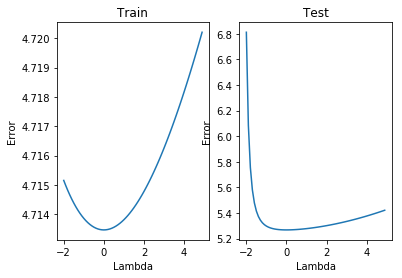

[[-0.37330198 -0.53666054  0.47744332 ...  0.          0.
   1.        ]
 [ 0.37844566  0.3238215  -1.03442075 ...  0.          0.
   1.        ]
 [-0.03919192  0.02012196 -0.5692318  ...  1.          0.
   0.        ]
 ...
 [-0.08095568 -0.13172782 -0.10404286 ...  0.          0.
   1.        ]
 [-1.16681338 -0.94159327 -0.68552904 ...  1.          0.
   0.        ]
 [-1.58445096 -1.65022554 -1.15071798 ...  0.          1.
   0.        ]]


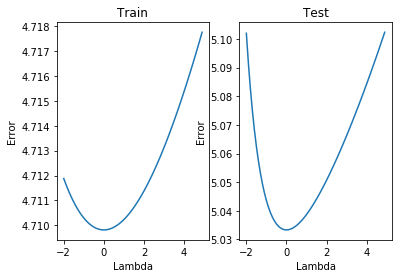

[[ 0.79608323  0.77937082  0.59374056 ...  1.          0.
   0.        ]
 [-2.83736369 -2.76379053 -2.31369035 ...  0.          1.
   0.        ]
 [-0.28977447 -0.232961    0.24484885 ...  1.          0.
   0.        ]
 ...
 [ 0.92137451  0.93122059  0.94263227 ...  1.          0.
   0.        ]
 [-0.03919192  0.07073855  0.82633503 ...  0.          0.
   1.        ]
 [ 0.54550069  0.77937082 -0.45293457 ...  0.          0.
   1.        ]]


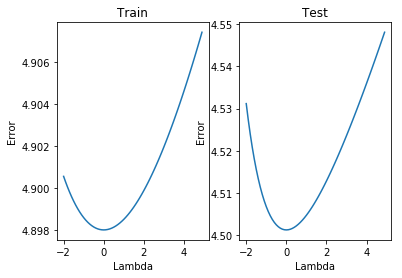

[[ 0.87961075  0.93122059  0.47744332 ...  1.          0.
   0.        ]
 [-0.87446708 -0.89097668 -0.5692318  ...  0.          1.
   0.        ]
 [ 0.04433559  0.47567127  0.59374056 ...  1.          0.
   0.        ]
 ...
 [ 0.87961075  0.82998741  1.9893074  ...  1.          0.
   0.        ]
 [-0.62388453 -0.58727713 -0.45293457 ...  0.          1.
   0.        ]
 [ 0.50373693  0.42505468  0.24484885 ...  0.          0.
   1.        ]]


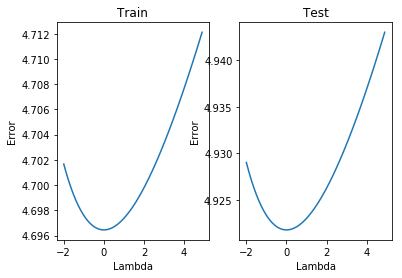

[[-0.24801071  0.02012196 -0.33663733 ...  1.          0.
   0.        ]
 [-2.37796236 -2.25762463 -1.8485014  ...  0.          1.
   0.        ]
 [-1.08328587 -1.2959094  -1.38331246 ...  0.          0.
   1.        ]
 ...
 [ 1.08842954  1.84231922  1.40782121 ...  0.          0.
   1.        ]
 [ 0.87961075  0.82998741  1.9893074  ...  1.          0.
   0.        ]
 [-0.87446708 -1.04282645 -1.15071798 ...  0.          1.
   0.        ]]


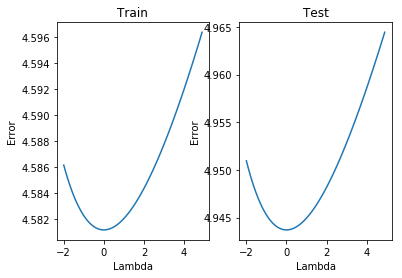

[5.364277462060606, 5.058472545828413, 4.517158231597521, 4.928113882930285, 4.949951740008401]
2
[0.1, 0.2, 0.3, 0.4, 0.5]
avg =  [5.364277462060606, 5.058472545828413, 4.517158231597521, 4.928113882930285, 4.949951740008401]


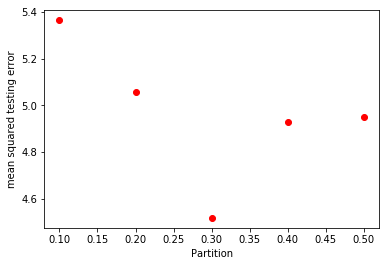

In [234]:
partition = []
ans_new_test_avg = []
for j in range(1,6):
    partition.append(j/10)
    #Randomly divide data into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=j/10)
    
    #Standardizing the training input variables.
    std_new_train = []
    mean_new_train = np.mean(X_train,axis=0)
    for p in range(len(X_train[0])):
        std_new.append(np.std(X_train[:,p],axis=0))
    for k in range(len(X_train)):
        for h in range(len(X_train[0])-3):
            X_train[k,h] = (X_train[k,h] - mean_new[h])/ std_new[h]
    
    #Standardizing the testing input variables.
    std_new_test = []
    mean_new_test = np.mean(X_test,axis=0)
    for p in range(len(X_test[0])):
        std_new.append(np.std(X_test[:,p],axis=0))
    for u in range(len(X_test)):
        for v in range(len(X_test[0])-3):
            X_test[u,v] = X_test[u,v] - mean_new[v]/ std_new[v]
            
    print(X_train)

    lamb_new = np.arange(-2,5,0.1)
    ans_new_train,ans_new_test =[],[]
    
    for i in range(len(lamb_new)):
#         print(lamb_new[i])
        weights_train = mylinridgereg(X_train,y_train,lamb_new[i])
        y_dash_train = mylinridgeregeval(X_train, weights_train)
        ans_new_train.append(meansquarederr(y_train, y_dash_train))

        weights_test = mylinridgereg(X_test,y_test,lamb_new[i])
        y_dash_test = mylinridgeregeval(X_test, weights_test)
        ans_new_test.append(meansquarederr(y_test, y_dash_test))
        
    ans_new_test_avg.append(sum(ans_new_test)/len(ans_new_test))

    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.plot(lamb_new,ans_new_train)
    plt.title("Train")
    plt.xlabel("Lambda")
    plt.ylabel("Error")

    plt.subplot(1,2,2)
    plt.plot(lamb_new,ans_new_test)
    plt.title("Test")
    plt.xlabel("Lambda")
    plt.ylabel("Error")
    plt.show()
 
np.asarray(ans_new_test_avg)
print(ans_new_test_avg)
print(np.argmin(ans_new_test_avg))
print(partition)
    
plt.figure(6)
print("avg = ",ans_new_test_avg)
plt.plot(partition,ans_new_test_avg,'ro')
plt.xlabel("Partition")
plt.ylabel("mean squared testing error")
plt.show()
        
        
        
                
        

0.3
[ 9.35240384  6.67308072 10.73455804 ...  7.17350973 12.63965218
 11.90726274]


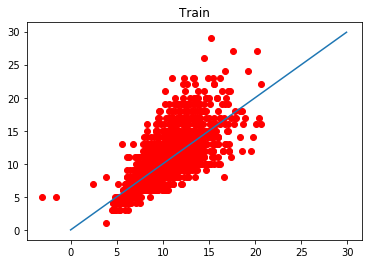

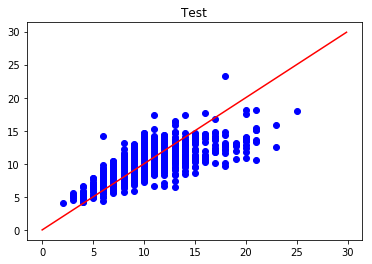

In [238]:
%matplotlib inline
xa = np.arange(0,30,0.1)
ya = xa
print(partition[np.argmin(ans_new_test_avg)])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=partition[np.argmin(ans_new_test_avg)])

std_new_train = []
mean_new_train = np.mean(X_train,axis=0)
for p in range(len(X_train[0])):
    std_new.append(np.std(X_train[:,p],axis=0))
for k in range(len(X_train)):
    for h in range(len(X_train[0])-3):
        X_train[k,h] = (X_train[k,h] - mean_new[h])/ std_new[h]

#Standardizing the testing input variables.
std_new_test = []
mean_new_test = np.mean(X_test,axis=0)
for p in range(len(X_test[0])):
    std_new.append(np.std(X_test[:,p],axis=0))
for u in range(len(X_test)):
    for v in range(len(X_test[0])-3):
        X_test[u,v] = X_test[u,v] - mean_new[v]/ std_new[v]





# std_new_train = []
# mean_new_train = np.mean(X_train,axis=0)
# for p in range(len(X_train[0])):
#     std_new.append(np.std(X_train[:,p],axis=0))
    
# for k in range(len(X_train)):
#     for h in range(len(X_train[0])):
#         X_train[k,h] = (X_train[k,h] - mean_new_train[h])/ std_new_train[h]

# std_new_test = []
# mean_new_test = np.mean(X_test,axis=0)
# for p in range(len(X_test[0])):
#     std_new.append(np.std(X_test[:,p],axis=0))
    
# for u in range(len(X_test)):
#     for v in range(len(X_test[0])):
#         X_test[u,v] = X_test[u,v] - mean_new_test[v]/ std_new_test[v]
        
lamb_best = lamb_min
weights_train_best = mylinridgereg(X_train,y_train,lamb_best)
y_dash_train_best = mylinridgeregeval(X_train, weights_train_best)
print(y_dash_train_best)

plt.figure(1)
plt.title('Train')
plt.plot(y_dash_train_best,y_train,'ro')
plt.plot(xa,ya)

weights_test_best = mylinridgereg(X_test,y_test,lamb_best)
y_dash_test_best = mylinridgeregeval(X_test, weights_test_best)

plt.figure(2)
plt.title('Test')
plt.plot(y_test,y_dash_test_best,'bo')
plt.plot(xa,ya,'r')
plt.show()
